# 데이터 로드

In [1]:
!pip install konlpy

     |████████████████████████████████| 19.4 MB 1.2 MB/s 
     |████████████████████████████████| 448 kB 46.4 MB/s 


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import urllib.request
from collections import Counter
from konlpy.tag import Mecab
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
%matplotlib inline
import seaborn as sns
from scipy.stats import norm

In [3]:
from google.colab import files
files.upload()

Saving submission.csv to submission.csv
Saving test.csv to test.csv
Saving train.csv to train.csv


{'submission.csv': b'id,count\r\n0,\r\n1,\r\n2,\r\n4,\r\n5,\r\n10,\r\n11,\r\n12,\r\n15,\r\n17,\r\n18,\r\n23,\r\n25,\r\n26,\r\n31,\r\n39,\r\n40,\r\n41,\r\n42,\r\n43,\r\n51,\r\n52,\r\n54,\r\n60,\r\n61,\r\n62,\r\n63,\r\n65,\r\n66,\r\n68,\r\n71,\r\n80,\r\n82,\r\n94,\r\n98,\r\n101,\r\n102,\r\n107,\r\n112,\r\n113,\r\n115,\r\n116,\r\n120,\r\n121,\r\n122,\r\n132,\r\n143,\r\n147,\r\n150,\r\n151,\r\n152,\r\n153,\r\n155,\r\n156,\r\n159,\r\n161,\r\n163,\r\n177,\r\n186,\r\n188,\r\n190,\r\n191,\r\n192,\r\n195,\r\n200,\r\n209,\r\n210,\r\n211,\r\n214,\r\n215,\r\n218,\r\n219,\r\n222,\r\n225,\r\n228,\r\n236,\r\n241,\r\n242,\r\n243,\r\n245,\r\n247,\r\n251,\r\n252,\r\n253,\r\n254,\r\n258,\r\n260,\r\n261,\r\n265,\r\n266,\r\n267,\r\n269,\r\n270,\r\n275,\r\n278,\r\n279,\r\n286,\r\n287,\r\n288,\r\n289,\r\n293,\r\n294,\r\n297,\r\n302,\r\n303,\r\n304,\r\n307,\r\n309,\r\n311,\r\n312,\r\n314,\r\n315,\r\n319,\r\n322,\r\n323,\r\n325,\r\n327,\r\n330,\r\n332,\r\n333,\r\n338,\r\n341,\r\n345,\r\n348,\r\n349,\r\n350,\r\

In [31]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')
submission = pd.read_csv('/content/submission.csv')

In [32]:
train.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [33]:
test.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5
0,0,7,20.7,0.0,1.3,62.0,954.0,0.041,44.0,27.0
1,1,17,30.0,0.0,5.4,33.0,1590.0,0.061,49.0,36.0
2,2,13,19.0,1.0,2.1,95.0,193.0,0.020,36.0,28.0
3,4,6,22.5,0.0,2.5,60.0,1185.0,0.027,52.0,38.0
4,5,22,14.6,1.0,3.4,93.0,218.0,0.041,18.0,15.0


In [34]:
train.corr()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
id,1.000000,-0.010901,-0.000029,-0.056267,-0.003353,-0.017948,0.008950,0.055234,-0.025510,0.003545,-0.002131
hour,-0.010901,1.000000,0.407306,0.021646,0.462797,-0.329612,0.176491,0.390188,-0.035907,-0.061229,0.626047
hour_bef_temperature,-0.000029,0.407306,1.000000,-0.097056,0.375618,-0.496088,0.197417,0.541228,-0.003830,-0.078665,0.619404
hour_bef_precipitation,-0.056267,0.021646,-0.097056,1.000000,0.022746,0.276481,-0.217155,-0.062461,-0.051266,0.004742,-0.163985
hour_bef_windspeed,-0.003353,0.462797,0.375618,0.022746,1.000000,-0.433012,0.252092,0.520526,0.010176,-0.199113,0.459906
hour_bef_humidity,-0.017948,-0.329612,-0.496088,0.276481,-0.433012,1.000000,-0.592244,-0.421047,-0.108106,0.167736,-0.471142
hour_bef_visibility,0.008950,0.176491,0.197417,-0.217155,0.252092,-0.592244,1.000000,0.101899,-0.403277,-0.644989,0.299094
hour_bef_ozone,0.055234,0.390188,0.541228,-0.062461,0.520526,-0.421047,0.101899,1.000000,0.113015,0.017313,0.477614
hour_bef_pm10,-0.025510,-0.035907,-0.003830,-0.051266,0.010176,-0.108106,-0.403277,0.113015,1.000000,0.489558,-0.114288
hour_bef_pm2.5,0.003545,-0.061229,-0.078665,0.004742,-0.199113,0.167736,-0.644989,0.017313,0.489558,1.000000,-0.134293


In [35]:
train = train.drop(['hour_bef_precipitation','hour_bef_pm10','hour_bef_pm2.5'],axis=1)
test = test.drop(['hour_bef_precipitation','hour_bef_pm10','hour_bef_pm2.5'],axis=1)

# 결측값 처리

In [36]:
train.isnull().sum()

id                       0
hour                     0
hour_bef_temperature     2
hour_bef_windspeed       9
hour_bef_humidity        2
hour_bef_visibility      2
hour_bef_ozone          76
count                    0
dtype: int64

In [37]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

it = train.copy()
it = IterativeImputer(random_state = 42).fit_transform(it)

it = pd.DataFrame(it)
it.columns = train.columns

train = it

it_test = test.copy()
it_test = IterativeImputer(random_state = 42).fit_transform(it_test)

it_test = pd.DataFrame(it_test)
it_test.columns = test.columns

test = it_test

# 이상치 처리

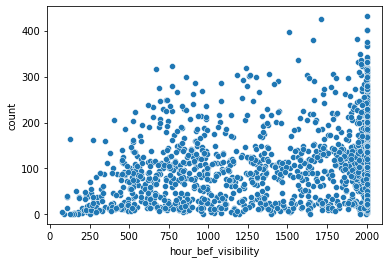

In [38]:
sns.scatterplot(x=train['hour_bef_visibility'],y=train['count'])

In [39]:
train = train.drop(['hour_bef_visibility'],axis = 1)
test = test.drop(['hour_bef_visibility'],axis = 1)

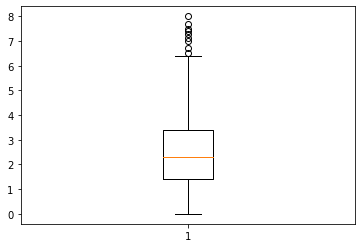

In [40]:
fig, ax = plt.subplots()
ax.boxplot(train['hour_bef_windspeed'])
plt.show()

In [41]:
def outtrain(i):
  Q3, Q1 = np.percentile(i,[75,25])
  IQR = Q3 - Q1
  out = i[(Q1-1.5*IQR > i) | (Q3 + 1.5*IQR < i)]
  global train
  train = train.drop(out.index,axis = 0)

outtrain(train['hour_bef_windspeed'])
outtrain(train['hour_bef_ozone'])

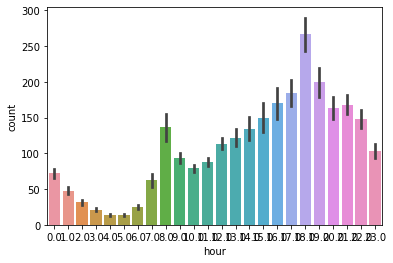

In [42]:
sns.barplot(x=train['hour'],y=train['count'])

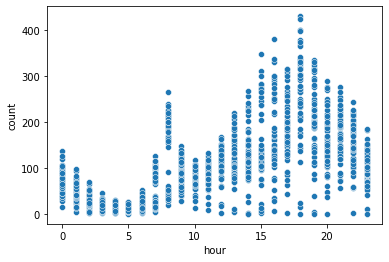

In [43]:
sns.scatterplot(x=train['hour'],y=train['count'])

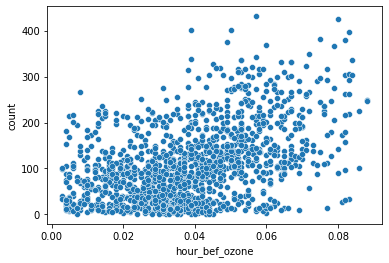

In [44]:
sns.scatterplot(x=train['hour_bef_ozone'],y=train['count'])

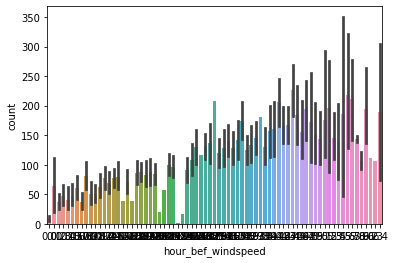

In [45]:
sns.barplot(data=train,x=train['hour_bef_windspeed'],y=train['count'])

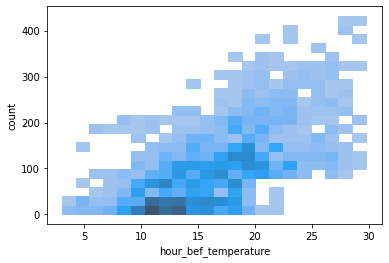

In [46]:
sns.histplot(x=train['hour_bef_temperature'],y=train['count'])

# XGBoost

In [47]:
submission_id = test['id']
y_train = train['count']
test = test.drop(['id'],axis = 1)
train = train.drop(['id','count'],axis = 1)

In [48]:
train.shape,test.shape

((1435, 5), (715, 5))

In [49]:
# import xgboost as xgb 
# from xgboost import plot_importance 
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
# from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score

# xtr, xte, ytr, yte = train_test_split(train, y_train, test_size=0.3, random_state=37, shuffle=True)

# dtrain = xgb.DMatrix(data=xtr, label = ytr)
# dtest = xgb.DMatrix(data=xte, label=yte)

# params = {'max_depth' : 11,
#          'eta' : 0.1, 
#          'eval_metric' : 'rmse',
#          'early_stoppings' : 300 }

# num_rounds = 500

# wlist = [(dtrain, 'train'), (dtest,'eval')]

# xgb_model = xgb.train(params = params, dtrain=dtrain, num_boost_round=num_rounds, evals=wlist)
# pred_probs = xgb_model.predict(dtest)

In [50]:
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth' : [3,4,5,6],
              'n_estimaters':[100,200],
              'max_features':[0,1,3,5.6],
              'min_samples_leaf':[0,1,3],
              'min_samples_split':[8,16,20],
              'learning_rate':[0.05,0.08,0.1]}
sea = GridSearchCV(XGBRegressor(random_state=42),param_grid,cv=2,n_jobs=-1,scoring = 'neg_mean_squared_error')
sea.fit(train,y_train)

[01:31:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


GridSearchCV(cv=2, estimator=XGBRegressor(random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.08, 0.1],
                         'max_depth': [3, 4, 5, 6],
                         'max_features': [0, 1, 3, 5.6],
                         'min_samples_leaf': [0, 1, 3],
                         'min_samples_split': [8, 16, 20],
                         'n_estimaters': [100, 200]},
             scoring='neg_mean_squared_error')

In [51]:
sea.best_params_

{'learning_rate': 0.05,
 'max_depth': 5,
 'max_features': 0,
 'min_samples_leaf': 0,
 'min_samples_split': 8,
 'n_estimaters': 100}

In [52]:
np.sqrt(-sea.best_score_)

41.0232873931255

In [53]:
pred_xgb = sea.predict(test) 

In [54]:
submission = pd.DataFrame({'id': [int(i) for i in submission_id], 'count': pred_xgb},index=test.index)
submission

,id,count
0,0,91.187424
1,1,197.838318
2,2,86.950058
3,4,38.065269
4,5,72.603401
...,...,...
710,2148,60.622662
711,2149,62.785641
712,2165,113.083817
713,2166,140.121216


In [55]:
submission.to_csv('sampleSubmission.csv',index = False)